**Name:** Avinash Shukla <br />
**Roll No:** 210236
***
## Instructions

- **Release Date**: **21st Jan 2024**  
- **Deadline**: **Part B : 4th Feb 2024 11:59PM**
- Kindly name your submission files as `RollNo_Name_A1_PartB.ipynb`, based on the part you are submitting. Marks will be deducted for all submissions that do not follow the naming guidelines. <br />
- You are required to work out your answers and submit only the iPython Notebook. The code should be well commented and easy to understand as there are marks for this. This notebook can be used as a template for assignment submission. <br />
- Submissions are to be made through HelloIITK portal. Submissions made through mail will not be graded.<br />
- Answers to the theory questions if any should be included in the notebook itself. While using special symbols use the $\LaTeX$ mode <br />
- Make sure your plots are clear and have title, legends and clear lines, etc. <br />
- Plagiarism of any form will not be tolerated. If your solutions are found to match with other students or from other uncited sources, there will be heavy penalties and the incident will be reported to the disciplinary authorities. <br />
- In case you have any doubts, feel free to reach out to TAs for help. <br />

***


In [1]:
# Required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Parameters
num_experiments = 500
T = 10000
K = 2
delta = 1/4
delta_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]


***
## Part B questions

Now that we have familiarized ourselves with the basic setup let us test a few more stratergies as part of the assignment problem.

Consider a two-armed Bernoulli bandit scenario with true means given by $\mu_1 = \frac{1}{2}, \mu_2= \frac{1}{2}+\Delta$, for some $\Delta < \frac{1}{2}$. Let the time horizon be $T=10000$. `[20 Marks]`

### B1
Take $\Delta=\frac{1}{4}$ and run the Monte Carlo simulations to estimate the expected regret of the ETC algorithm which explores each arm $m = T^{2/3} (\log T)^{1/3}$ times before committing. Specifically, you run the ETC algorithm to compute the sample regret
$$ \mu_2 * T - \sum_{t=1}^T R_t, $$
where $R_t$ is the reward obtained in time step $t$.

Repeat this experiment 500 times and estimate the expected regret by taking the average of the sample regrets you obtained in all those 500 experiments. `[5 Marks]`

In [3]:
## Solution for B1 problem ##


# Monte Carlo simulations
total_regrets = []

for _ in range(num_experiments):
    # Generate true means based on given values and arms
    mu1 = 1/2
    mu2 = 1/2 + delta

    # Initialize ETC algorithm parameters
    m = int(T**(2/3) * (np.log(T))**(1/3))
    empirical_means = np.zeros(K)
    arm_counts = np.zeros(K)
    total_regret = 0

    # Run ETC algorithm
    for t in range(1, T + 1):
        # Explore each arm m times
        if t <= K * m:
            chosen_arm = (t - 1) % K
        else:
            # Commit to the arm with the highest empirical mean
            chosen_arm = np.argmax(empirical_means)

        # Observe the reward
        reward = np.random.binomial(1, mu1 if chosen_arm == 0 else mu2)

        # Update empirical means and counts
        arm_counts[chosen_arm] += 1
        empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

        # Update total regret
        total_regret += mu2  - reward

    # Record total regret for this experiment
    total_regrets.append(total_regret)

# Calculate average regret
average_regret = np.mean(total_regrets)

print(f"Average Regret: {average_regret}")


Average Regret: 245.376


**Few Points Regarding ETC(Explore-Then-Commit) algorithm-**  <br />
The ETC (Explore-Then-Commit) algorithm is a bandit algorithm that explores each arm a certain number of times before committing to the arm with the highest estimated mean. In this case, the exploration parameter is set as 𝑚 = 𝑇^(2/3) (log 𝑇)^(1/3).<br />


### B2

Repeat the above for various values of $\Delta \in \{0.05, 0.1, 0.2, 0.3, 0.4, 0.45\}$ and plot the estimated regret as a function of $\Delta$ and verify whether it satisfies the regret upper bound we derived in class. `[5 Marks]`

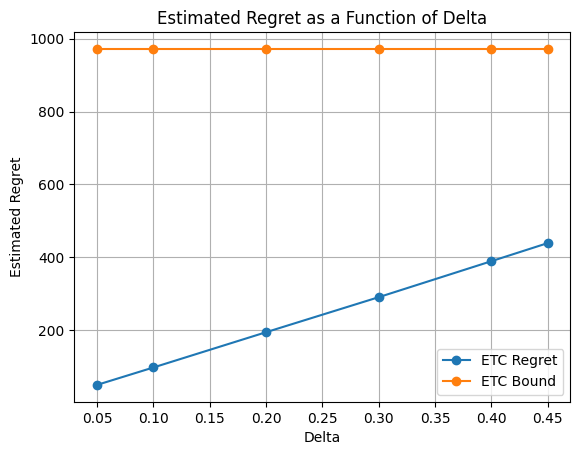

In [4]:
## Solution for B2 problem ##

# Initialize lists to store results
average_regrets_etc = []
etc_bound = []

for delta in delta_values:
    total_regrets = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu1 = 0.5
        mu2 = 0.5 + delta

        # Initialize ETC algorithm parameters
        m = int(T**(2/3) * (np.log(T))**(1/3))
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K)
        total_regret = 0

        # Run ETC algorithm
        for t in range(1, T + 1):
            # Explore each arm m times
            if t <= K * m:
                chosen_arm = (t - 1) % K
            else:
                # Commit to the arm with the highest empirical mean
                chosen_arm = np.argmax(empirical_means)

            # Observe the reward
            reward = np.random.binomial(1, mu1 if chosen_arm == 0 else mu2)

            # Update empirical means and counts
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            total_regret += mu2 - reward

        # Record total regret for this experiment
        total_regrets.append(total_regret)

    # Calculate average regret for this delta
    average_regret = np.mean(total_regrets)
    average_regrets_etc.append(average_regret)
    etc_bound.append(m)

# Plotting
plt.plot(delta_values, average_regrets_etc, marker='o',label = 'ETC Regret')
plt.plot(delta_values, etc_bound, marker='o', label='ETC Bound')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
print(average_regrets_etc)

[48.937999999986, 96.80999999996155, 193.73799999990774, 290.0420000001021, 388.9479999998071, 438.69399999989395]


### B3
Repeat the experiment with the UCB algorithm and plot the comparison with ETC. `[10 Marks]`

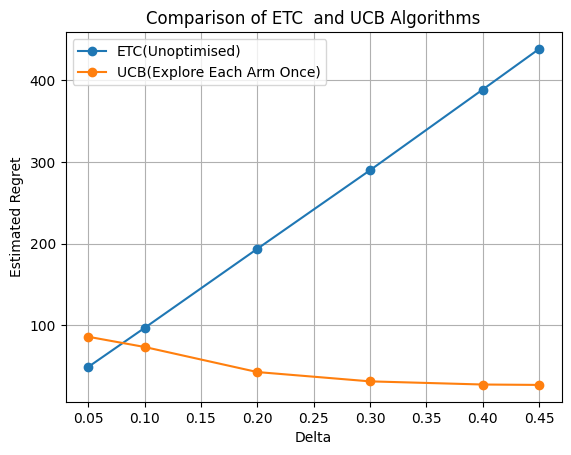

In [6]:
## Solution for B3 problem ##

# Initialize lists to store results
average_regrets_ucb = []

# UCB constant
c_ucb = np.sqrt(3/2)

for delta in delta_values:
    total_regrets_ucb = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu1 = 0.5
        mu2 = 0.5 + delta

        # Initialize UCB algorithm parameters
        empirical_means = np.zeros(K)
        arm_counts = np.ones(K)  # Explore each arm once
        total_regret_ucb = 0

        # Run UCB algorithm after exploring each arm once
        for t in range(K + 1, T + 1):
            # Calculate UCB for each arm
            ucb_values = empirical_means + c_ucb * np.sqrt(np.log(t) / (arm_counts + 1e-6))

            # Choose the arm with the highest UCB
            chosen_arm = np.argmax(ucb_values)

            # Observe the reward
            reward = np.random.binomial(1, mu1 if chosen_arm == 0 else mu2)

            # Update empirical means and counts for the chosen arm
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            total_regret_ucb += mu2 - reward

        # Record total regret for this experiment
        total_regrets_ucb.append(total_regret_ucb)

    # Calculate average regret for this delta
    average_regret_ucb = np.mean(total_regrets_ucb)
    average_regrets_ucb.append(average_regret_ucb)

# Comparison of ETC and UCB algorithm.
plt.plot(delta_values, average_regrets_etc, marker='o', label='ETC(Unoptimised)')
plt.plot(delta_values, average_regrets_ucb, marker='o', label='UCB(Explore Each Arm Once)')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Comparison of ETC  and UCB Algorithms')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
print(average_regrets_ucb)

[85.98199999999258, 73.45999999998538, 42.72800000001098, 31.315999999991714, 27.45999999999551, 26.958000000003143]


**The Upper Confidence Bound (UCB) algorithm** is a popular algorithm used in multi-armed bandit problems. Its key idea is to balance exploration and exploitation by choosing arms based on both their empirical means and an exploration term. The exploration term is designed to account for uncertainty in the estimates of arm means. Here's how UCB works:

Assuming we have two arms with true means $\mu_1 = \frac{1}{2}$ and $\mu_2 = \frac{1}{2} + \frac{1}{4}$, and a time horizon $T = 10000$, the UCB algorithm proceeds as follows:

**Initialization:**
- Initialize empirical means and counts for each arm.
- For each arm $i$, set the empirical mean $Q_i$ to $0$ and the count $N_i$ to $0$.

**For each time step $t$ from $1$ to $T$:**
- For each arm $i$, calculate the Upper Confidence Bound (UCB) for that arm:
  $$ UCB_i(t) = Q_i(t) + c \sqrt{\frac{\log(t)}{N_i(t)}} $$
  where:
  - $Q_i(t)$ is the empirical mean of arm $i$ at time $t$.
  - $N_i(t)$ is the count of arm $i$ at time $t$.
  - $c$ is a constant that determines the level of exploration.
- Choose the arm with the highest UCB: $ \text{chosen\_arm} = \underset{i}{\text{arg max}} UCB_i(t) $

- Observe the reward $R_t$ for the chosen arm.
- Update the empirical mean and count for the chosen arm:
$$ Q_{\text{chosen\_arm}}(t + 1) = \frac{Q_{\text{chosen\_arm}}(t) \cdot N_{\text{chosen\_arm}}(t) + R_t}{N_{\text{chosen\_arm}}(t) + 1} $$
$$ N_{\text{chosen\_arm}}(t + 1) = N_{\text{chosen\_arm}}(t) + 1 $$


**Repeat until $t = T$.**

The constant $c$ in the UCB formula controls the trade-off between exploration and exploitation. A common choice is $c = \sqrt{2}$, but we can take $c = \sqrt{3/2}$ as we derived in the class.


### B4
(**Bonus**) In the ETC algorithm, assume that we know $\Delta$, and choose a better $m$ as function of $\Delta$ and repeat the experiments and compare with UCB. What did you observe?

Hint: Check how many samples of exploration are required to make $\epsilon < \frac{\Delta}{2}$ with a high probability of $1-\frac{1}{T}$. `[5 Marks]`

**Calculation of Optimal m using the known value of Δ :**

To optimize the Explore-Then-Commit (ETC) algorithm with respect to the known value of Δ, we can choose a better exploration parameter $m$ as a function of Δ. The goal is to find an $m$ such that, with high probability, the estimated mean difference $ϵ$ between the two arms is less than Δ/2.

Given that $T$ is the total number of time steps, we can use the **Hoeffding inequality** to bound the probability of the estimate being far from the true mean. The Hoeffding inequality states that for a random variable $X_i$ in the range [a, b], the probability that the average $\bar{X}$ deviates from the true mean by more than $ϵ$ is given by:



$ P(|\bar{X} - \mu| \geq ϵ) \leq 2e^{-2mϵ^2 / (b-a)^2} $

In the context of the bandit problem, if $X_i$ is the reward from choosing arm $i$ in a single time step, the range is [0, 1], and $ϵ$ is the difference between the true means $μ_2 - μ_1$.<br />
As we discussed in class regret analysis of ETC Algorithm in context of Good Event and Bad Event where defined both the events as -<br />
Good Event - Both the arms with true means $μ1$ and $μ2$ are within their specified intervals - $μ(a) ∈ [μ(a) − ε, μ(a) + ε]$
 <br />
With high probability of $1-\frac{1}{T}$ , so the probability of Bad Event becomes $\frac{1}{T}$<br />
Probability of Bad Events is calculated as - <br />
$$P(\text{bad event}) = P(\text{at least one arm outside predicted intervals})$$
$$P(\text{bad event}) = P(\vert u(a) - \overline{u_t(a)}\vert > \epsilon) + P(\vert u(b) - \overline{u_t(b)}\vert > \epsilon)$$
$$ P(\text{bad event}) \leq 2e^{-2m\epsilon^2} + 2e^{-2m\epsilon^2} $$

So, 
\begin{equation} \tag{2}
    P(\text{bad event}) \leq 4e^{-2m\epsilon^2}
\end{equation}

As we were given in the problem statement that $\epsilon < \frac{\Delta}{2}$ with a high probability of $1-\frac{1}{T}$,

$$ \frac{1}{T} \leq 4e^{-2m\epsilon^2} $$

$$-\log(4T) \leq -2mϵ^2$$
$$\epsilon \leq \sqrt{\frac{\log(4T)}{2m}} < \frac{\Delta}{2}$$
<br />

For this specific scenario, we want to find  $m$:<br />
Therefore,
$$m \geq \frac{2\log(4T)}{\Delta^2}$$


Solving this inequality for $m$ gives us an idea of how many exploration steps are needed to achieve a high probability of having accurate estimates.



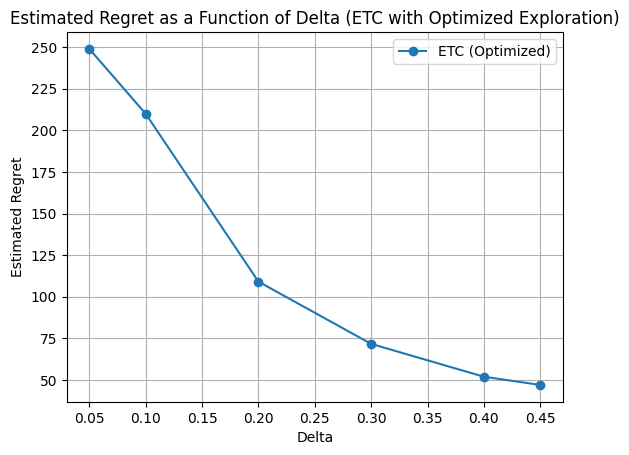

In [8]:
## Solution for B4 Problem ##

# Here's a modification to the code that includes this consideration for the ETC algorithm:

# Initialize lists to store results
average_regrets_etc_optimized = []

for delta in delta_values:
    total_regrets_etc_optimized = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu1 = 0.5
        mu2 = 0.5 + delta

        # Calculate optimized m based on Hoeffding inequality
        m_optimized = int(np.log(4 * T) / (2 * (delta/2)**2))

        # Initialize ETC algorithm parameters with optimized m
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K)
        total_regret_etc_optimized = 0

        # Run ETC algorithm with optimized m
        for t in range(1, T + 1):
            # Explore each arm m times
            if t <= K * m_optimized:
                chosen_arm = (t - 1) % K
            else:
                # Commit to the arm with the highest empirical mean
                chosen_arm = np.argmax(empirical_means)

            # Observe the reward
            reward = np.random.binomial(1, mu1 if chosen_arm == 0 else mu2)

            # Update empirical means and counts
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            total_regret_etc_optimized += mu2  - reward

        # Record total regret for this experiment
        total_regrets_etc_optimized.append(total_regret_etc_optimized)

    # Calculate average regret for this delta
    average_regret_etc_optimized = np.mean(total_regrets_etc_optimized)
    average_regrets_etc_optimized.append(average_regret_etc_optimized)

# Plotting
plt.plot(delta_values, average_regrets_etc_optimized, marker='o', label='ETC (Optimized)')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta (ETC with Optimized Exploration)')
plt.legend()
plt.grid(True)
plt.show()

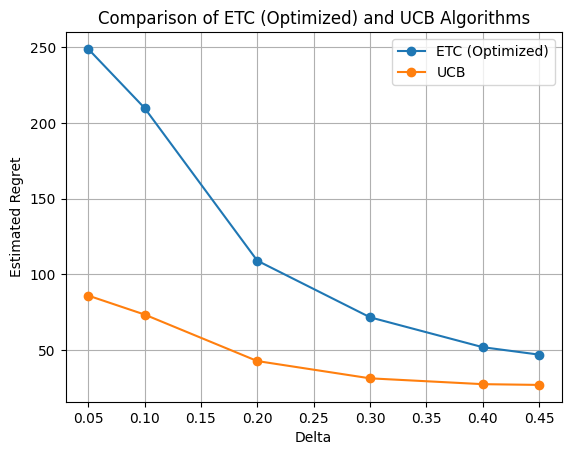

In [9]:
#Comparison of Optimised ETC with UCB algorithm -

plt.plot(delta_values, average_regrets_etc_optimized, marker='o', label='ETC (Optimized)')
plt.plot(delta_values, average_regrets_ucb, marker='o', label='UCB')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Comparison of ETC (Optimized) and UCB Algorithms')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion :** <br />
The results demonstrate a common phenomenon. If ETC is tuned with the
optimal choice of commitment time for each choice of ∆ then it can match the outcomes of the parameter-free UCB, though only by a relatively small margin. If, however,
the commitment time must be chosen without the knowledge of ∆, for ∆ getting
large, or for ∆ being bounded, n getting large, UCB arbitrarily outperforms
ETC.



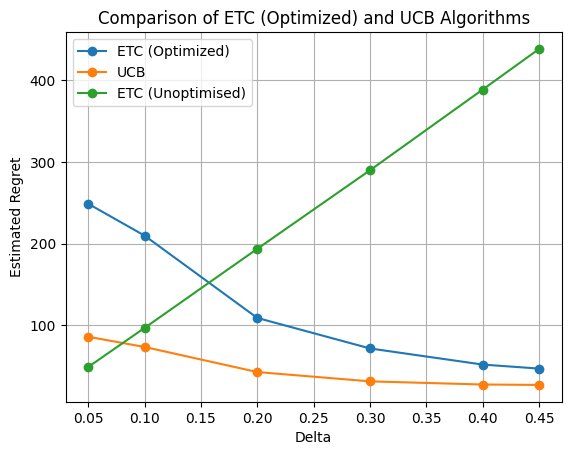

In [10]:
#Final plot containing all the Algorithm's estimated regret vs delta

plt.plot(delta_values, average_regrets_etc_optimized, marker='o', label='ETC (Optimized)')
plt.plot(delta_values, average_regrets_ucb, marker='o', label='UCB')
plt.plot(delta_values, average_regrets_etc, marker='o',label='ETC (Unoptimised)')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Comparison of ETC (Optimized) and UCB Algorithms')
plt.legend()
plt.grid(True)
plt.show()